In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Read the file

df = pd.read_csv("ACCGames1819.csv")
df = df.drop(["GameDate"], axis=1)
df

,NeutralSite,AwayTeam,AwayScore,AwayAST,AwayTOV,AwaySTL,AwayBLK,AwayRebounds,AwayORB,AwayDRB,...,HomeRebounds,HomeORB,HomeDRB,HomeFGA,HomeFGM,Home3FGM,Home3FGA,HomeFTA,HomeFTM,HomeFouls
0,0,Notre Dame Fighting Irish,66,13,11,2,5,30,13,17,...,24,2,22,55,33,11,18,5,4,13
1,0,North Carolina State Wolfpack,87,17,16,4,3,50,17,33,...,27,9,18,61,28,10,25,29,16,14
2,0,Clemson Tigers,68,14,16,6,2,35,9,26,...,39,12,27,67,32,7,23,21,16,15
3,0,Boston College Eagles,66,10,12,4,2,25,5,20,...,31,8,23,54,25,6,22,25,21,18
4,0,Syracuse Orange,72,11,9,4,3,43,13,30,...,35,9,26,58,20,11,33,17,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,1,Louisville Cardinals,70,18,11,2,2,33,5,28,...,37,7,30,65,30,7,20,21,16,17
145,1,Syracuse Orange,72,7,17,8,3,27,9,18,...,35,10,25,54,29,7,23,28,19,17
146,1,Florida State Seminoles,69,10,12,3,3,33,9,24,...,18,6,12,53,22,5,24,13,10,17
147,1,Duke Blue Devils,74,15,12,6,6,34,9,25,...,38,15,23,73,29,4,26,15,11,15


In [230]:
# For each game, calculate the point differential and winner side

df["Deficit"] = abs(df["AwayScore"] - df["HomeScore"])
# home ---> 1   away ---> 0
df["WinnerSide"] = np.where(df['HomeScore'] > df['AwayScore'], 1, 0)
df["WinnerTeam"] = np.where(df['HomeScore'] > df['AwayScore'], df['HomeTeam'], df['AwayTeam'])
df["LoserTeam"] = np.where(df['HomeScore'] < df['AwayScore'], df['HomeTeam'], df['AwayTeam'])


After adding necessary features to data frame, start with the very basic approach : 
win rates of the teams. This will not give the most correct solution but surely
provide a sensible result.

In [231]:
away_count = df.AwayTeam.value_counts()
home_count = df.HomeTeam.value_counts()
game_count = away_count.add(home_count)
winner_count = df.WinnerTeam.value_counts()

win_rates = winner_count.divide(game_count)
win_rates.sort_values(ascending=False)

Virginia Cavaliers              0.85000
North Carolina Tar Heels        0.85000
Duke Blue Devils                0.80952
Florida State Seminoles         0.71429
Virginia Tech Hokies            0.65000
Syracuse Orange                 0.55000
Louisville Cardinals            0.55000
North Carolina State Wolfpack   0.50000
Clemson Tigers                  0.47368
Georgia Tech Yellow Jackets     0.31579
Miami (FL) Hurricanes           0.30000
Boston College Eagles           0.26316
Wake Forest Demon Deacons       0.21053
Pittsburgh Panthers             0.20000
Notre Dame Fighting Irish       0.20000
dtype: float64

In [232]:
win_rate_df = pd.DataFrame(data=win_rates.sort_values(ascending=False), columns=["WinRate"])
win_rate_df["WinRateRank"] = range(1, 16)
win_rate_df

,WinRate,WinRateRank
Virginia Cavaliers,0.85000,1
North Carolina Tar Heels,0.85000,2
Duke Blue Devils,0.80952,3
Florida State Seminoles,0.71429,4
Virginia Tech Hokies,0.65000,5
Syracuse Orange,0.55000,6
Louisville Cardinals,0.55000,7
North Carolina State Wolfpack,0.50000,8
Clemson Tigers,0.47368,9
Georgia Tech Yellow Jackets,0.31579,10


After calculating the win rates of the teams, next step is the point differentials. This will give the
information that teams really deserve their spots or they underachieved or overachieved?

In [233]:
winner_deficits = df.groupby("WinnerTeam").sum().Deficit.sort_values(ascending=False)
loser_deficits = df.groupby("LoserTeam").sum().Deficit.sort_values(ascending=False)
total_deficits = winner_deficits.subtract(loser_deficits)
total_deficits = total_deficits / game_count
total_deficits.sort_values(ascending=False)

Virginia Cavaliers               12.90000
North Carolina Tar Heels         10.45000
Duke Blue Devils                  8.47619
Louisville Cardinals              4.70000
Florida State Seminoles           4.61905
Virginia Tech Hokies              4.10000
Clemson Tigers                    2.36842
Syracuse Orange                   0.05000
North Carolina State Wolfpack    -0.60000
Miami (FL) Hurricanes            -4.90000
Notre Dame Fighting Irish        -7.20000
Boston College Eagles            -7.26316
Pittsburgh Panthers              -7.90000
Georgia Tech Yellow Jackets      -8.52632
Wake Forest Demon Deacons       -13.26316
dtype: float64

In [234]:
deficit_df = pd.DataFrame(data=total_deficits.sort_values(ascending=False), columns=["DeficitPG"])
deficit_df["DeficitRank"] = range(1, 16)
deficit_df

,DeficitPG,DeficitRank
Virginia Cavaliers,12.90000,1
North Carolina Tar Heels,10.45000,2
Duke Blue Devils,8.47619,3
Louisville Cardinals,4.70000,4
Florida State Seminoles,4.61905,5
Virginia Tech Hokies,4.10000,6
Clemson Tigers,2.36842,7
Syracuse Orange,0.05000,8
North Carolina State Wolfpack,-0.60000,9
Miami (FL) Hurricanes,-4.90000,10


In [235]:
merged = win_rate_df.merge(deficit_df, left_index=True, right_index=True)
merged["PositionDiff"] = merged["DeficitRank"] - merged["WinRateRank"]
merged

,WinRate,WinRateRank,DeficitPG,DeficitRank,PositionDiff
Virginia Cavaliers,0.85000,1,12.90000,1,0
North Carolina Tar Heels,0.85000,2,10.45000,2,0
Duke Blue Devils,0.80952,3,8.47619,3,0
Florida State Seminoles,0.71429,4,4.61905,5,1
Virginia Tech Hokies,0.65000,5,4.10000,6,1
Syracuse Orange,0.55000,6,0.05000,8,2
Louisville Cardinals,0.55000,7,4.70000,4,-3
North Carolina State Wolfpack,0.50000,8,-0.60000,9,1
Clemson Tigers,0.47368,9,2.36842,7,-2
Georgia Tech Yellow Jackets,0.31579,10,-8.52632,14,4


As it seen from the table, some teams' positions does not reflect their win percentage. For example, Georgia Tech Yellow 
Jackets's win percentage is way higher when we look at their point differential. This can be result of winning close games
and losing games with big deficits. However, this is something impossible to sustain for a long period.

For this task, one other important thing is feature selection. Which features are relevant to determine the winner side?
For instance, start with **home court advantage**. Does it really matters?

In [236]:
not_neutral = df[df['NeutralSite'] == 0]
not_neutral.WinnerSide.value_counts()

1    80
0    55
Name: WinnerSide, dtype: int64

Out of the 135 games, home teams won 80 of them. That makes almost %60. When consider there are 15 teams on the league
and there are only 149 games, this is a very small portion and %60 is not a significant difference. Hence,
with this data, it is hard to talk about a home-court advantage. Let's see the correlation of all features against the
winner side.

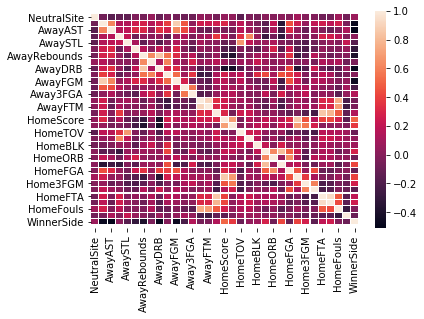

In [237]:
corr_matrix = df.corr()
graph = sns.heatmap(corr_matrix, linewidths = 0.1, annot = False)
bottom, top = graph.get_ylim()
graph.set_ylim(bottom + 0.5, top - 0.5)
corr_target_row = corr_matrix["WinnerSide"]

Text(0.5, 1.0, 'Correlation of features')

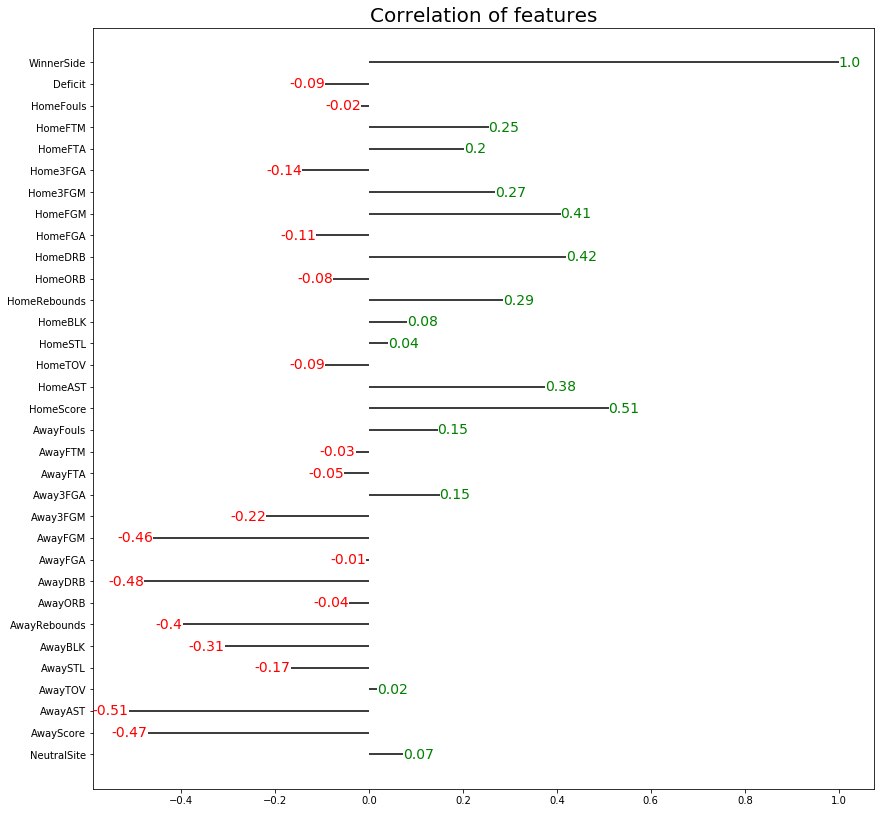

In [238]:
# See the results better in a graph

plt.figure(figsize = (14, 14))
plt.hlines(y = corr_target_row.index, xmin = 0, xmax = corr_target_row.values)

for x, y, tex in zip(corr_target_row.values, corr_target_row.index, corr_target_row.values):
    t = plt.text(x, y, round(tex, 2), horizontalalignment = 'right' if x < 0 else 'left', 
    verticalalignment = 'center', fontdict = {'color':'red' if x < 0 else 'green', 'size':14})

plt.title('Correlation of features', fontdict = {'size':20})

It is very clear that, number of **assists** and **defensive rebounds** are very crucial to win a game. Number of assists 
means team-work and collective work. Big individual performances may win games but it is impossible to continue for a 
long period. Same thing goes for defensive rebounds. There is no way to be a successful basketball team while giving 
multiple chances to opponent in same offense. First, start with assists :

In [239]:
home_assists = df.groupby("HomeTeam").sum().HomeAST.sort_values(ascending=False)
away_assists = df.groupby("AwayTeam").sum().AwayAST.sort_values(ascending=False)
total_assists = home_assists.add(away_assists)
total_assists = total_assists / game_count
total_assists.sort_values(ascending=False)

assists_df = pd.DataFrame(data=total_assists.sort_values(ascending=False), columns=["Assists"])
assists_df

,Assists
North Carolina Tar Heels,18.75000
Duke Blue Devils,14.61905
Virginia Cavaliers,14.15000
Louisville Cardinals,13.90000
Virginia Tech Hokies,13.75000
North Carolina State Wolfpack,13.25000
Florida State Seminoles,13.00000
Georgia Tech Yellow Jackets,12.63158
Clemson Tigers,12.31579
Boston College Eagles,12.21053


Not surprisingly, this table is very similar to other two tables obtained before. More assists means more wins!

In [240]:
home_def_reb = df.groupby("HomeTeam").sum().HomeRebounds.sort_values(ascending=False)
away_def_reb = df.groupby("AwayTeam").sum().AwayRebounds.sort_values(ascending=False)
total_def_reb = home_def_reb.add(away_def_reb)
total_def_reb = total_def_reb / game_count
total_def_reb.sort_values(ascending=False)

def_reb_df = pd.DataFrame(data=total_def_reb.sort_values(ascending=False), columns=["DefRebounds"])

merged = merged.drop(["PositionDiff"], axis=1)
merged = merged.merge(assists_df, left_index=True, right_index=True)
merged = merged.merge(def_reb_df, left_index=True, right_index=True)
merged["Games"] = game_count
merged

,WinRate,WinRateRank,DeficitPG,DeficitRank,Assists,DefRebounds,Games
Virginia Cavaliers,0.85000,1,12.90000,1,14.15000,32.10000,20
North Carolina Tar Heels,0.85000,2,10.45000,2,18.75000,39.65000,20
Duke Blue Devils,0.80952,3,8.47619,3,14.61905,36.61905,21
Florida State Seminoles,0.71429,4,4.61905,5,13.00000,35.14286,21
Virginia Tech Hokies,0.65000,5,4.10000,6,13.75000,28.70000,20
Syracuse Orange,0.55000,6,0.05000,8,11.65000,30.50000,20
Louisville Cardinals,0.55000,7,4.70000,4,13.90000,36.30000,20
North Carolina State Wolfpack,0.50000,8,-0.60000,9,13.25000,33.60000,20
Clemson Tigers,0.47368,9,2.36842,7,12.31579,32.78947,19
Georgia Tech Yellow Jackets,0.31579,10,-8.52632,14,12.63158,28.84211,19


Until now, prepared all required features and data. Other features such as; blocks, turnovers, 3-points, steals are not
much effective when deciding the winner side, at least according to our small data.

To predict the final standings at the end of the season, I have decided to use 4 features : 

- Point Differential Per Game
- Win Percentage
- Assists Per Game
- Defensive Rebounds Per Game

Win Percentage is a very good base to start with. I will use 3 other features to improve the win rate predictions.

At first, normalize these 3 features to between 0-1.

In [241]:
merged["DeficitPG"] = (merged["DeficitPG"]-merged["DeficitPG"].min()) / (merged["DeficitPG"].max()-merged["DeficitPG"].min())
merged["Assists"] = (merged["Assists"]-merged["Assists"].min()) / (merged["Assists"].max()-merged["Assists"].min())
merged["DefRebounds"] = (merged["DefRebounds"]-merged["DefRebounds"].min()) / (merged["DefRebounds"].max()-merged["DefRebounds"].min())
merged

,WinRate,WinRateRank,DeficitPG,DeficitRank,Assists,DefRebounds,Games
Virginia Cavaliers,0.85000,1,1.00000,1,0.47429,0.31050,20
North Carolina Tar Heels,0.85000,2,0.90636,2,1.00000,1.00000,20
Duke Blue Devils,0.80952,3,0.83091,3,0.52789,0.72320,21
Florida State Seminoles,0.71429,4,0.68349,5,0.34286,0.58839,21
Virginia Tech Hokies,0.65000,5,0.66365,6,0.42857,0.00000,20
Syracuse Orange,0.55000,6,0.50885,8,0.18857,0.16438,20
Louisville Cardinals,0.55000,7,0.68658,4,0.44571,0.69406,20
North Carolina State Wolfpack,0.50000,8,0.48401,9,0.37143,0.44749,20
Clemson Tigers,0.47368,9,0.59747,7,0.26466,0.37347,19
Georgia Tech Yellow Jackets,0.31579,10,0.18105,14,0.30075,0.01298,19


From the feature correlations graph above, number of assists and defensive rebounds are effects the winning side almost
equally. And I will use these 3 features as follows :

- Point Differential Per Game ---> effects win percentage %50
- Assists Per Game            ---> effects win percentage %25
- Defensive Rebounds Per Game ---> effects win percentage %25

All 3 of them already scaled in between 0 and 1, so it is good to go. I will sum these 3 values and take the mean with
respect to actual win percentage. 

In [242]:
merged["DeficitPG"] = merged["DeficitPG"] / 2
merged["Assists"] = merged["Assists"] / 4
merged["DefRebounds"] = merged["DefRebounds"] / 4
merged["Combined"] = merged["DeficitPG"] + merged["Assists"] + merged["DefRebounds"]
predicted = pd.DataFrame(data=((merged["WinRate"] + merged["Combined"]) / 2).sort_values(ascending=False), 
                         columns=["Predicted Win %"])
predicted

,Predicted Win %
North Carolina Tar Heels,0.90159
Virginia Cavaliers,0.77310
Duke Blue Devils,0.76888
Florida State Seminoles,0.64442
Louisville Cardinals,0.58912
Virginia Tech Hokies,0.54448
North Carolina State Wolfpack,0.47337
Clemson Tigers,0.46597
Syracuse Orange,0.44633
Miami (FL) Hurricanes,0.26719


This is my final predicted win percentages table. Since all teams have played 18 normal season + playoff games(1-3 games),
I had to deal with a very small amount of game data. Also it is very difficult to predict the result of a elimination game.
Everything can happen in a single game, especially if its college basketball.
